In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
#Comparing highly variable regions (HVR1 AND HV2) of the rCRS
print("Upload rCRS.fasta file:")
uploaded = files.upload()


Upload rCRS.fasta file:


Saving rCRS.fasta to rCRS.fasta


In [3]:
fname = list(uploaded.keys())[0]

In [4]:
#Open the uploaded file to read it as f and put every line of the file into list called lines
with open(fname, 'r') as f:
    lines = f.readlines()
rcrs_seq = "".join([line.strip() for line in lines if not line.startswith(">")]).upper() #to join the neucleotides and not consider starting line which begins with ">"

In [5]:
#just to check rCRS file was imported correctly
print("Length of rCRS sequence:", len(rcrs_seq))
print("First 50 bases:", rcrs_seq[:50])

Length of rCRS sequence: 16569
First 50 bases: GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCAT


In [6]:
#Extracting HVR1 and HVR2 of rCRS and comparing lengths
def hv_regions(sequence, start, end):
    return sequence[start-1:end]
hvr1= hv_regions(rcrs_seq, 16024, 16383)
hvr2= hv_regions(rcrs_seq, 57, 372)
print("Length of Hyper variable region 1 (HVR1) (should be around 360):" ,len(hvr1))
print("Length of Hyper variable region 2 (HVR2) (should be around 315):" ,len(hvr2))

Length of Hyper variable region 1 (HVR1) (should be around 360): 360
Length of Hyper variable region 2 (HVR2) (should be around 315): 316


In [7]:
print("HVR1:", hvr1[:50] )
print("HVR2:", hvr2[:50] )

HVR1: TTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCC
HVR2: TTTTCGTCTGGGGGGTATGCACGCGATAGCATTGCGAGACGCTGGAGCCG


In [8]:
#using the Counter in Python to count the number of each base pair present in required region,percentage of ATGC each and GC content.
def base_stats(seq):
    seq = seq.upper()
    counts = Counter(seq)
    length = len(seq)
    atgc = {b: counts.get(b, 0) for b in ["A","T","G","C"]}
    percent = {f"{b}%": (atgc [b] / length * 100 ) for b in atgc}
    gc_content = ((atgc["G"]+atgc["C"])/length*100)
    return {"Length:": length,
            "A%:": round(percent["A%"] ,2),
            "T%:": round(percent["T%"], 2),
            "G%:": round(percent["G%"], 2),
            "C%:": round(percent["C%"], 2),
            "GC content%:": round(gc_content, 2)
            }


In [9]:
#Comparing the HVR1 and HVR2 regions of the rCRS itself
hvr1_stats = base_stats(hvr1)
hvr2_stats = base_stats(hvr2)
df = pd.DataFrame([hvr1_stats, hvr2_stats], index=["HVR1 (16024-16383)", "HVR2 (57-372)"])
display(df)

,Length:,A%:,T%:,G%:,C%:,GC content%:
HVR1 (16024-16383),360,32.78,21.94,11.39,33.89,45.28
HVR2 (57-372),316,29.75,25.95,15.82,28.48,44.30


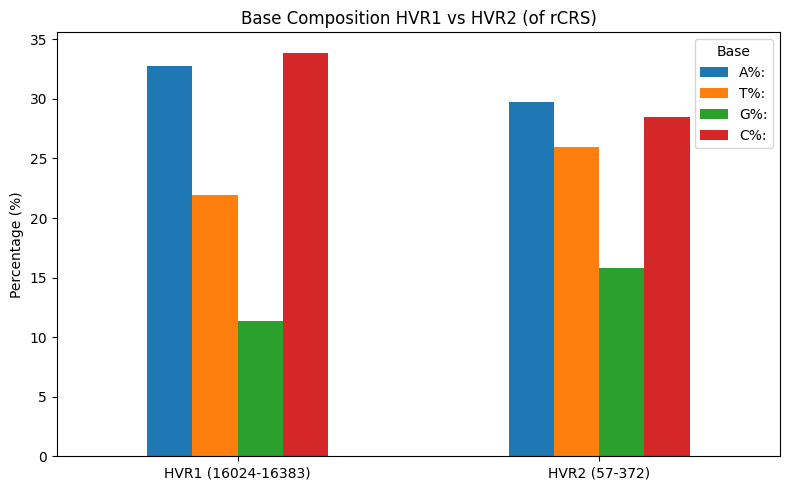

In [10]:
df_plot = df[["A%:", "T%:", "G%:", "C%:"]]

# Plotting the HVR1 and HVR2 regions of the rCRS
df_plot.plot(kind="bar", figsize=(8,5))

plt.title("Base Composition HVR1 vs HVR2 (of rCRS)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Base")
plt.tight_layout()
plt.show()

In [11]:
#Uploading person1 and person2 mitochondrial DNA
print("Upload person1 and person 2 fasta files")
uploaded = files.upload()

Upload person1 and person 2 fasta files


Saving person 1.fasta to person 1.fasta
Saving person2.fasta to person2.fasta


In [12]:
#To open and read mtdna of person1 and person 2 (Same thing we did for rCRS)
with open("person 1.fasta", "r") as f:
  lines = f.readlines()
person1_seq= "".join([line.strip() for line in lines if not line.startswith(">")]).upper()
with open("person2.fasta", "r") as f:
  lines = f.readlines()
person2_seq= "".join([line.strip() for line in lines if not line.startswith(">")]).upper()

In [13]:
#Extracting only HVR1 regions of person1 and person2 for comparison
p1_hvr1 = hv_regions(person1_seq, 16024, 16383)
print(p1_hvr1)
print("Length if HVR1 of person1:", len(p1_hvr1))
p2_hvr1 = hv_regions(person2_seq, 16024, 16383)
print(p2_hvr1)
print("Length if HVR1 of person2:", len(p2_hvr1))

TCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAACCGCTATGTATTTCGTACATTACTGCCAGCCACCATGAATATTGTACGGTACCATAAATACTTGACCACCTGTAGTACATAAAAACCCAATCCACATCAAACCCCCCCCCCCATGCTTACAAGCAAGTACAGCAATCAACCCTCAACTATCACACATCAACTGCAACCCCAAAGCCACCCCTCACCCACTAGGATACCAACAAACCTACCCACCCTTAACAGTACATAGTACATAAAGCCATTTACCGTACATAGCACATTACAGTCAAATCCCTTCTCGCCCCCATGGATGACCCCCCTCAG
Length if HVR1 of person1: 360
TGTTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAACCGCTATGTATTTCGTACATTACTGCCAGCCACCATGAATATTGTACGGTACCATAAATACTTGACCACCTGTAGTACATAAAAACCCAATCCACATCAAAACCCCCTCCCCATGCTTACAAGCAAGTACAGCAATCAACCCTCAACTATCACACATCAACTGCAACTCCAAAGCCACCCCTCACCCACTAGGATACCAACAAACCTACCCACCCTTAACAGCACATAGTACATAAAGCCATTTACCGTACATAGCACATTACAGTCAAATCCCTTCTCGTCCCCATGGATGACCCCCCT
Length if HVR1 of person2: 360


In [14]:
def comparing_to_rcrs(rcrs_seq, person_seq, ref_postion):
  mutations = []
  for i in range(len(rcrs_seq)):
     rcrs_base = rcrs_seq[i]
     person_base = person_seq[i]
     if rcrs_base != person_base:
       postion = ref_postion + i
       mut = f"{postion}:{rcrs_base}->{person_base}"
       mutations.append(mut)
    #(OR)mutations.append((postion, rcrs_base, person_base))
  return mutations

In [15]:
p1_mutprofile = comparing_to_rcrs(hvr1, p1_hvr1, 16024)
print("Mutation profile of person 1:", p1_mutprofile)

Mutation profile of person 1: ['16025:T->C', '16026:C->T', '16029:T->C', '16030:C->A', '16031:A->T', '16032:T->G', '16036:G->A', '16038:A->G', '16039:G->C', '16040:C->A', '16041:A->G', '16042:G->A', '16043:A->T', '16046:T->G', '16049:G->T', '16050:T->A', '16051:A->C', '16053:C->A', '16054:A->C', '16057:C->A', '16059:A->G', '16060:G->T', '16061:T->A', '16062:A->T', '16064:T->G', '16065:G->A', '16066:A->C', '16067:C->T', '16068:T->C', '16069:C->A', '16070:A->C', '16073:C->A', '16074:A->T', '16075:T->C', '16076:C->A', '16078:A->C', '16079:C->A', '16081:A->C', '16083:C->G', '16084:G->C', '16085:C->T', '16086:T->A', '16087:A->T', '16088:T->G', '16089:G->T', '16090:T->A', '16091:A->T', '16094:T->C', '16095:C->G', '16096:G->T', '16097:T->A', '16098:A->C', '16099:C->A', '16100:A->T', '16102:T->A', '16103:A->C', '16104:C->T', '16105:T->G', '16106:G->C', '16108:C->A', '16109:A->G', '16110:G->C', '16112:C->A', '16113:A->C', '16115:C->A', '16116:A->T', '16117:T->G', '16118:G->A', '16120:A->T', '16

In [16]:
p2_mutprofile = comparing_to_rcrs(hvr1, p2_hvr1, 16024)
print("Mutation profile of person 2:", p2_mutprofile)

Mutation profile of person 2: ['16025:T->G', '16026:C->T', '16028:T->C', '16030:C->T', '16031:A->T', '16032:T->C', '16033:G->A', '16034:G->T', '16037:A->G', '16038:A->G', '16039:G->A', '16040:C->A', '16041:A->G', '16042:G->C', '16044:T->G', '16045:T->A', '16047:G->T', '16048:G->T', '16050:T->G', '16051:A->G', '16052:C->T', '16053:C->A', '16054:A->C', '16056:C->A', '16058:A->C', '16059:A->C', '16060:G->A', '16061:T->A', '16062:A->G', '16064:T->A', '16065:G->T', '16066:A->T', '16067:C->G', '16068:T->A', '16070:A->T', '16072:C->A', '16074:A->C', '16075:T->C', '16076:C->A', '16077:A->T', '16078:A->C', '16079:C->A', '16081:A->C', '16082:C->A', '16083:C->A', '16084:G->C', '16086:T->G', '16087:A->C', '16089:G->A', '16091:A->G', '16093:T->A', '16095:C->T', '16096:G->T', '16097:T->C', '16098:A->G', '16099:C->T', '16101:T->C', '16102:T->A', '16103:A->T', '16104:C->T', '16105:T->A', '16106:G->C', '16107:C->T', '16108:C->G', '16109:A->C', '16110:G->C', '16111:C->A', '16112:C->G', '16113:A->C', '16

In [17]:
df = pd.DataFrame([p1_mutprofile, p2_mutprofile], index=["Person 1 Mutations", "Person 2 Mutations"])
display(df)
print("Number of mutations of HVR1 of person1 with respect to rCRS is: ",len(p1_mutprofile))
print("Number of mutations of HVR1 of person2 with respect to rCRS is: ",len(p2_mutprofile))

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Person 1 Mutations,16025:T->C,16026:C->T,16029:T->C,16030:C->A,16031:A->T,16032:T->G,16036:G->A,16038:A->G,16039:G->C,16040:C->A,...,None,None,None,None,None,None,None,None,None,None
Person 2 Mutations,16025:T->G,16026:C->T,16028:T->C,16030:C->T,16031:A->T,16032:T->C,16033:G->A,16034:G->T,16037:A->G,16038:A->G,...,16369:G->A,16370:G->T,16371:A->G,16372:T->G,16373:G->A,16374:A->T,16375:C->G,16376:C->A,16381:T->C,16383:A->T


Number of mutations of HVR1 of person1 with respect to rCRS is:  253
Number of mutations of HVR1 of person2 with respect to rCRS is:  266


Number of mutations unique to person 1: 179
Number of mutations unique to person 2: 192
Number of mutations common to both: 74


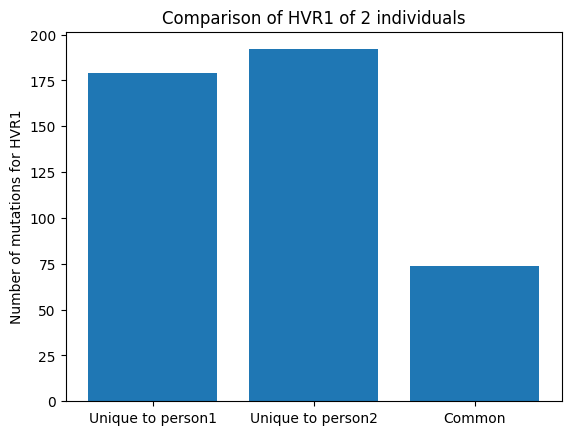

In [18]:
p1_hvr1mut = set (p1_mutprofile)
p2_hvr1mut = set (p2_mutprofile)
unique_p1 = p1_hvr1mut - p2_hvr1mut
unique_p2 = p2_hvr1mut - p1_hvr1mut
common_p1p2 = p1_hvr1mut & p2_hvr1mut
print("Number of mutations unique to person 1:",len(unique_p1))
print("Number of mutations unique to person 2:",len(unique_p2))
print("Number of mutations common to both:",len(common_p1p2))
plot = ["Unique to person1", "Unique to person2", "Common"]
data = [len(unique_p1), len(unique_p2), len(common_p1p2)]
plt.bar(plot,data)
plt.ylabel("Number of mutations for HVR1")
plt.title("Comparison of HVR1 of 2 individuals")
plt.show()